In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import nltk
import torch
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #progress bar tracker for loops

plt.style.use('ggplot')

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
student_file_path_fall_21 = '/kaggle/input/sec-student-correct/Fall_2021_Student_Feedback_Responses.xlsx'
student_file_path_fall_22 = '/kaggle/input/sec-student-correct/Fall_2022_Student_Feedback_Responses.xlsx'
student_file_path_fall_23 = '/kaggle/input/sec-student-correct/Fall_2023_Student_Feedback_In_Person_Career_Fair_Responses.xlsx'
student_file_path_spring_23 = '/kaggle/input/sec-student-correct/Spring_2023_Student_Feedback_Responses.xlsx'

student_fall_21 = pd.read_excel(student_file_path_fall_21)
student_fall_22 = pd.read_excel(student_file_path_fall_22)
student_fall_23 = pd.read_excel(student_file_path_fall_23)
student_spring_23 = pd.read_excel(student_file_path_spring_23)

In [3]:
student_fall_21.shape

(136, 22)

In [4]:
student_fall_23.rename(columns={'feedback_in_person\n\n(We cannot bring back the upstairs of the Hall of Champions due to construction).': 'feedback_in_person'}, inplace=True)
student_fall_21.rename(columns = { 'did_not_work_well' : 'feedback_what_did_not_work', 'worked_well' : 'feedback_what_worked'}, inplace = True)

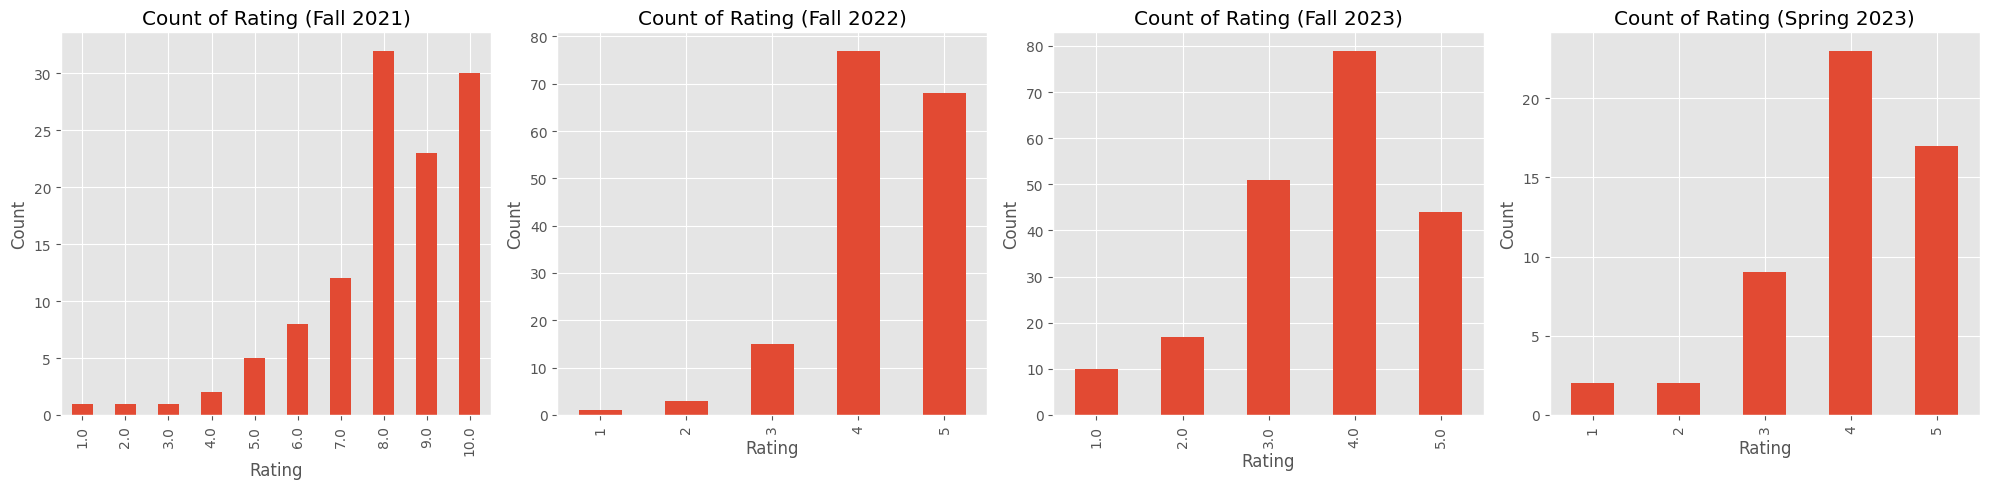

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))


dfs = [student_fall_21, student_fall_22, student_fall_23, student_spring_23]
titles = ['Fall 2021', 'Fall 2022', 'Fall 2023', 'Spring 2023']


for i, df in enumerate(dfs):
    df['overall_rating'].value_counts().sort_index().plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Count of Rating ({titles[i]})')
    axs[i].set_xlabel('Rating')
    axs[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
#for data in dfs:
#    data = data.fillna('No Feedback', inplace = True)

In [7]:
student_fall_22.head()

,id,attend_in_person_fair,companies_researched_before_fair,overall_rating,feedback_what_worked,feedback_what_did_not_work,feedback_improve_fair,attend_virtual_fair,rate_virtual_career_fair,favorite_features_virtual_app,...,rate_welcome_social_accessibility,rate_welcome_social_company_diversity,impact_welcome_social_on_fair,feedback_welcome_social,rate_ability_to_communicate_info,where_found_info,use_any_website_resources,feedback_communication,rate_whether_info_sent_timely,rate_documentation
0,1,Yes,11,1,Not much,"Layout, where companies were located",The booths are placed too close together to al...,No,NaN,NaN,...,NaN,NaN,NaN,NaN,4,Texas A&M Career Center (https://careercenter....,Company Search/Information,Need better accommodations for students with d...,4,3
1,2,Yes,4,2,Many companies,Not enough space for lines,Bigger companies should probably have more spa...,No,NaN,NaN,...,NaN,NaN,NaN,NaN,3,Friends/Classmates,"Company Search/Information, Student Checklist",emails,4,4
2,3,Yes,2,2,well-organized,very crowded,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,5,SEC Career Fair Website (https://careerfair.se...,Company Search/Information,NaN,5,3
3,4,Yes,1,2,There were a lot of companies,There were too many people and lines were long...,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,2,Major/Department Weekly Emails,I did not use any of the above resources,NaN,4,2
4,5,Yes,12,3,I was very happy to see more firms hiring for ...,The check in system this year felt slower than...,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,4,SEC Career Fair Website (https://careerfair.se...,Company Search/Information,NaN,4,3


In [8]:
student_spring_23.head()

,id,major,attend_in_person_fair,prepare_options,nr_companies_consider_working,top_companies_enjoyed,overall_rating,nr_recruiters_spoke_to,nr_hours,feedback_in_person,...,feedback_company_showcase,attend_welcome_social,rate_welcome_social,feedback_welcome_social,rate_ability_to_communicate_info,where_found_info,use_any_website_resources,feedback_communication,rate_whether_info_sent_timely,add_info
0,1,Other,Yes,"Updated and printed your resume, Looked at the...",6,"FBI, SICK",4,4,1-3 Hours,I did not like having to go outside to get to ...,...,NaN,No,NaN,NaN,3,"College of Engineering Weekly Emails, Major/De...",Company Search/Information,More emails farther out from the week that cla...,2,NaN
1,2,Civil and Environmental Engineering,Yes,"Updated and printed your resume, Looked at the...",1,Quiddity and TxDOT,4,2,1-3 Hours,Better Info on the two different entrances,...,NaN,No,NaN,NaN,3,SEC Career Fair Website (https://careerfair.se...,Company Search/Information,NaN,4,NaN
2,3,Electrical and Computer Engineering,Yes,"Updated and printed your resume, Looked at the...",5,Hydroquip\nCharter,5,13,1-3 Hours,I liked the bag drop off and pick up,...,NaN,No,NaN,NaN,5,"College of Engineering Weekly Emails, Major/De...","Company Search/Information, Student Checklist",NaN,5,NaN
3,4,Multidisciplinary Engineering,Yes,Updated and printed your resume,2,Beckhoff,2,10,1-3 Hours,It’s annoying when companies say they are hiri...,...,NaN,No,NaN,NaN,1,Friends/Classmates,NaN,NaN,2,Please instruct companies to know what majors ...
4,5,Other,Yes,"Updated and printed your resume, Looked at the...",10,Sparx,3,4,1-3 Hours,did not like having to exit to get to \nthe ot...,...,NaN,No,NaN,NaN,3,SEC Career Fair Website (https://careerfair.se...,"Company Search/Information, Symplicity tutoria...",NaN,3,NaN


In [9]:
from transformers import AutoTokenizer 
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [10]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [11]:
print("Columns for student_fall_21:")
print(student_fall_21.columns)
print()

print("Columns for student_fall_22:")
print(student_fall_22.columns)
print()

print("Columns for student_fall_23:")
print(student_fall_23.columns)
print()

print("Columns for student_spring_23:")
print(student_spring_23.columns)

Columns for student_fall_21:
Index(['id', 'major', 'classification', 'attend_company_showcase',
       'rate_company_showcase', 'feedback_company_showcase',
       'where_found_info', 'use_any_website_resources', 'any_dislike_comm',
       'rate_whether_info_sent_timely', 'rate_documentation',
       'feedback_documentation', 'date', 'overall_rating',
       'feedback_what_worked', 'feedback_what_did_not_work',
       'feedback_career_fair', 'rate_career_virtual_platform',
       'issues_career_virtual_platform',
       'favorite_features_career_virtual_platform',
       'future_features_career_virtual_platform', 'other_comm'],
      dtype='object')

Columns for student_fall_22:
Index(['id', 'attend_in_person_fair', 'companies_researched_before_fair',
       'overall_rating', 'feedback_what_worked', 'feedback_what_did_not_work',
       'feedback_improve_fair', 'attend_virtual_fair',
       'rate_virtual_career_fair', 'favorite_features_virtual_app',
       'issues_virtual_career_app', 

In [12]:
student_fall_23.rename(columns = {'feedback_in_person\n\nfeedback_in_person': 'feedback_in_person'}, inplace = True)

In [13]:
student_fall_21['Year'] = 'Fall 2021'
student_fall_22['Year'] = 'Fall 2022'
student_fall_23['Year'] = 'Fall 2023'
student_spring_23['Year'] = 'Spring 2023'

columns_of_interest_fall_21 = ['any_dislike_comm', 'feedback_company_showcase', 'feedback_documentation', 'feedback_what_worked', 'feedback_what_did_not_work', 'feedback_career_fair', 'other_comm']
columns_of_interest_fall_22 = ['feedback_what_worked', 'feedback_what_did_not_work','feedback_improve_fair', 'feedback_communication']
columns_of_interest_fall_23 = ['feedback_in_person']
columns_of_interest_spring_23 = ['feedback_in_person', 'feedback_communication', 'add_info']

columns_of_interest_dict = {
    'Fall 2021': columns_of_interest_fall_21,
    'Fall 2022': columns_of_interest_fall_22,
    'Fall 2023': columns_of_interest_fall_23,
    'Spring 2023': columns_of_interest_spring_23
}


In [14]:
for df, title in zip(dfs, titles):
    print(f"Original columns for {title}: {df.columns.tolist()}")
for df, title in zip(dfs, titles):
    columns_of_interest = columns_of_interest_dict.get(title, [])
    renamed_columns = [f"{col}_{title.replace(' ', '_').lower()}" for col in columns_of_interest]
    print(f"Renamed columns for {title}: {renamed_columns}")

Original columns for Fall 2021: ['id', 'major', 'classification', 'attend_company_showcase', 'rate_company_showcase', 'feedback_company_showcase', 'where_found_info', 'use_any_website_resources', 'any_dislike_comm', 'rate_whether_info_sent_timely', 'rate_documentation', 'feedback_documentation', 'date', 'overall_rating', 'feedback_what_worked', 'feedback_what_did_not_work', 'feedback_career_fair', 'rate_career_virtual_platform', 'issues_career_virtual_platform', 'favorite_features_career_virtual_platform', 'future_features_career_virtual_platform', 'other_comm', 'Year']
Original columns for Fall 2022: ['id', 'attend_in_person_fair', 'companies_researched_before_fair', 'overall_rating', 'feedback_what_worked', 'feedback_what_did_not_work', 'feedback_improve_fair', 'attend_virtual_fair', 'rate_virtual_career_fair', 'favorite_features_virtual_app', 'issues_virtual_career_app', 'future_features_career_app', 'attend_company_showcase', 'rate_company_showcase', 'rate_company_showcase_accessab

In [15]:



def sentiment_score(review):
    if pd.isna(review):
        return -1  # i'd want to set this to -1 since there could be text evaluated with a sentiment score of 0 
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits)) + 1



# Apply sentiment analysis and add to dataframes
for df, title in zip(dfs, titles):
    columns_of_interest = columns_of_interest_dict.get(title, [])
    suffix = title.replace(' ', '_').lower()
    for col in columns_of_interest:
        if col in df.columns:
            sentiment_col_name = f'{col}_sentiment_{suffix}'
            df[sentiment_col_name] = df[col].apply(sentiment_score)


In [16]:
student_fall_21.columns

Index(['id', 'major', 'classification', 'attend_company_showcase',
       'rate_company_showcase', 'feedback_company_showcase',
       'where_found_info', 'use_any_website_resources', 'any_dislike_comm',
       'rate_whether_info_sent_timely', 'rate_documentation',
       'feedback_documentation', 'date', 'overall_rating',
       'feedback_what_worked', 'feedback_what_did_not_work',
       'feedback_career_fair', 'rate_career_virtual_platform',
       'issues_career_virtual_platform',
       'favorite_features_career_virtual_platform',
       'future_features_career_virtual_platform', 'other_comm', 'Year',
       'any_dislike_comm_sentiment_fall_2021',
       'feedback_company_showcase_sentiment_fall_2021',
       'feedback_documentation_sentiment_fall_2021',
       'feedback_what_worked_sentiment_fall_2021',
       'feedback_what_did_not_work_sentiment_fall_2021',
       'feedback_career_fair_sentiment_fall_2021',
       'other_comm_sentiment_fall_2021'],
      dtype='object')

In [17]:
student_spring_23.head()

,id,major,attend_in_person_fair,prepare_options,nr_companies_consider_working,top_companies_enjoyed,overall_rating,nr_recruiters_spoke_to,nr_hours,feedback_in_person,...,rate_ability_to_communicate_info,where_found_info,use_any_website_resources,feedback_communication,rate_whether_info_sent_timely,add_info,Year,feedback_in_person_sentiment_spring_2023,feedback_communication_sentiment_spring_2023,add_info_sentiment_spring_2023
0,1,Other,Yes,"Updated and printed your resume, Looked at the...",6,"FBI, SICK",4,4,1-3 Hours,I did not like having to go outside to get to ...,...,3,"College of Engineering Weekly Emails, Major/De...",Company Search/Information,More emails farther out from the week that cla...,2,NaN,Spring 2023,2,2,-1
1,2,Civil and Environmental Engineering,Yes,"Updated and printed your resume, Looked at the...",1,Quiddity and TxDOT,4,2,1-3 Hours,Better Info on the two different entrances,...,3,SEC Career Fair Website (https://careerfair.se...,Company Search/Information,NaN,4,NaN,Spring 2023,3,-1,-1
2,3,Electrical and Computer Engineering,Yes,"Updated and printed your resume, Looked at the...",5,Hydroquip\nCharter,5,13,1-3 Hours,I liked the bag drop off and pick up,...,5,"College of Engineering Weekly Emails, Major/De...","Company Search/Information, Student Checklist",NaN,5,NaN,Spring 2023,4,-1,-1
3,4,Multidisciplinary Engineering,Yes,Updated and printed your resume,2,Beckhoff,2,10,1-3 Hours,It’s annoying when companies say they are hiri...,...,1,Friends/Classmates,NaN,NaN,2,Please instruct companies to know what majors ...,Spring 2023,3,-1,5
4,5,Other,Yes,"Updated and printed your resume, Looked at the...",10,Sparx,3,4,1-3 Hours,did not like having to exit to get to \nthe ot...,...,3,SEC Career Fair Website (https://careerfair.se...,"Company Search/Information, Symplicity tutoria...",NaN,3,NaN,Spring 2023,2,-1,-1


In [18]:
student_fall_23

,id,interesting_industries,nr_recruiters_spoke_to,nr_companies_consider_working,rate_company_interactiveness,attend_coming_spring,rate_company_quality,overall_rating,feedback_in_person,Year,feedback_in_person_sentiment_fall_2023
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2023,-1
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2023,-1
2,3,"Biotech / Pharmaceuticals, Consumer Products, ...",6 - 10,4,5.0,Yes,5.0,5.0,A little more communication at the entrances,Fall 2023,3
3,4,"Electronics, Manufacturing, Semiconductor, Tec...",1 - 5,3,4.0,Yes,5.0,4.0,Seat companies based on industry or major they...,Fall 2023,4
4,5,Aerospace / Aviation,1 - 5,2,3.0,Yes,4.0,3.0,NaN,Fall 2023,-1
...,...,...,...,...,...,...,...,...,...,...,...
198,199,"Energy / Power, Electronics, Semiconductor, Te...",1 - 5,2,5.0,NaN,3.0,4.0,The Fan Zone venue might have to reconsider ho...,Fall 2023,3
199,200,"Biotech / Pharmaceuticals, Sales",6 - 10,3,4.0,Yes,4.0,3.0,could not really find the headshot location ; ...,Fall 2023,3
200,201,"Consulting, Electronics, Software / Web / UX D...",16 +,4,3.0,NaN,4.0,4.0,More space honestly. Felt cluttered,Fall 2023,2
201,202,"Aerospace / Aviation, Electronics, Government ...",11 - 15,2,4.0,Yes,4.0,4.0,Assign booth numbers based on company names to...,Fall 2023,4


In [19]:
value = student_fall_23['feedback_in_person'].iloc[201]  
print(value)

Assign booth numbers based on company names to make it more clear which companies are in which venue.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


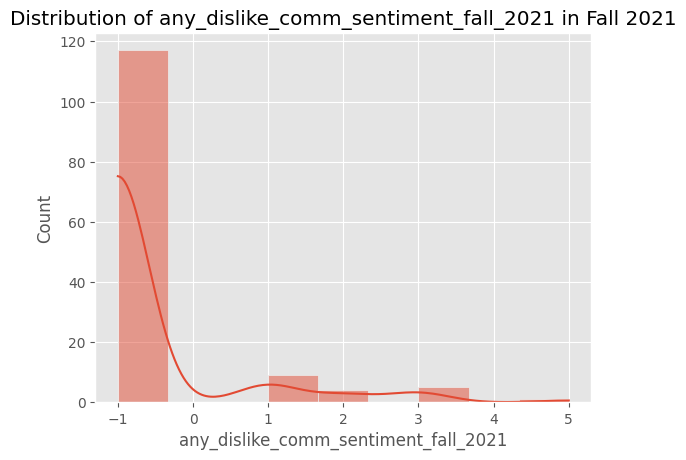

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


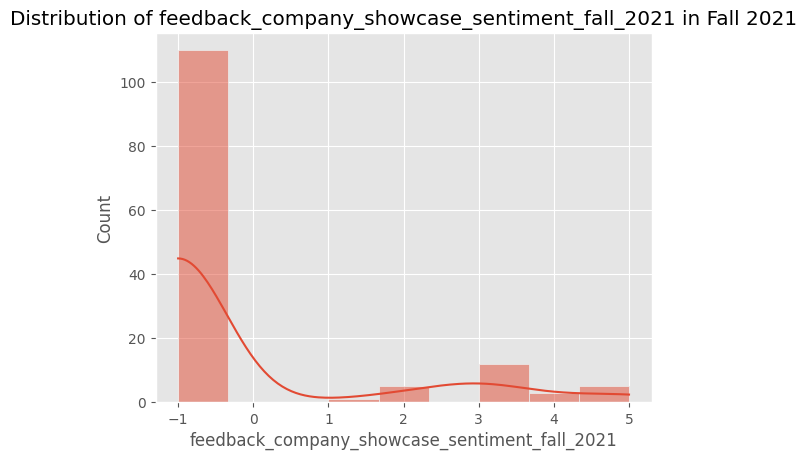

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


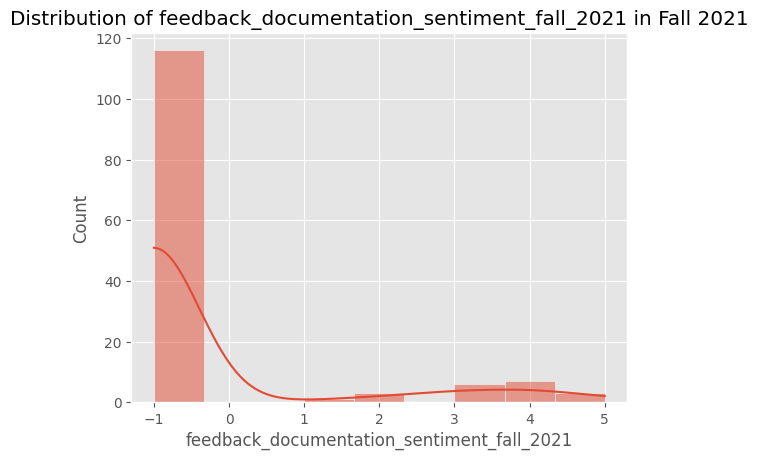

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


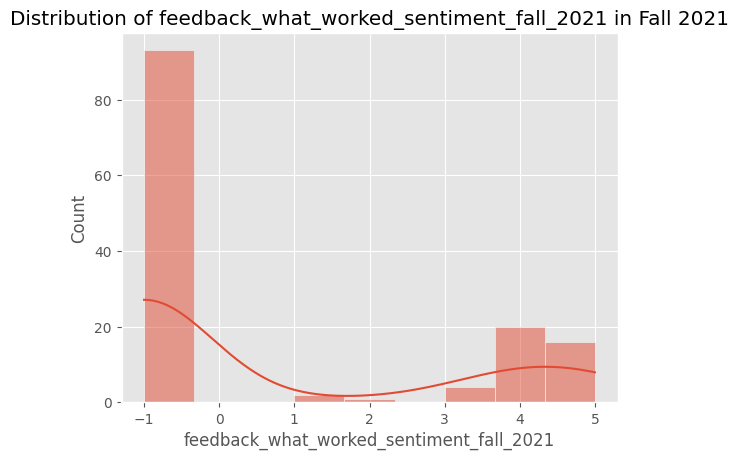

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


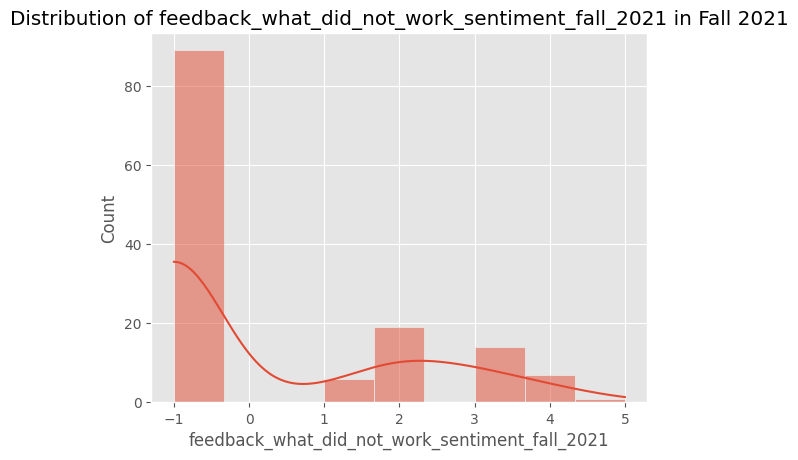

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


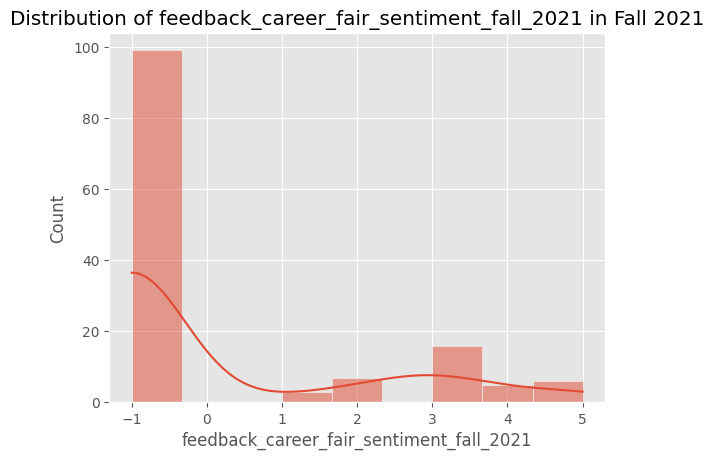

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


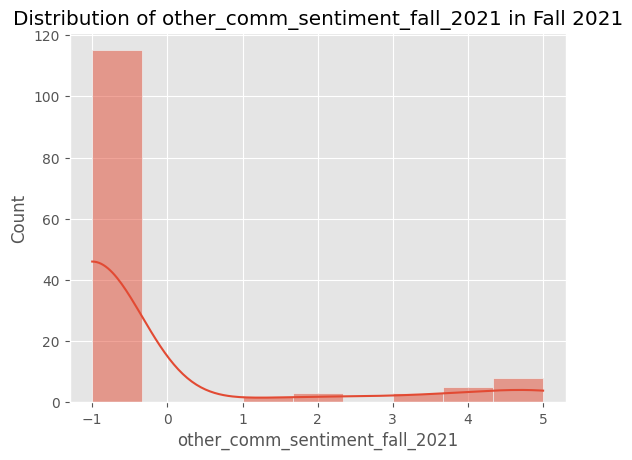

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


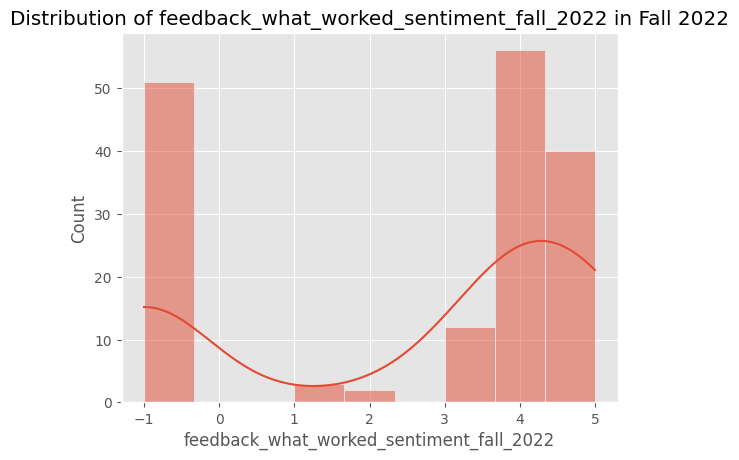

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


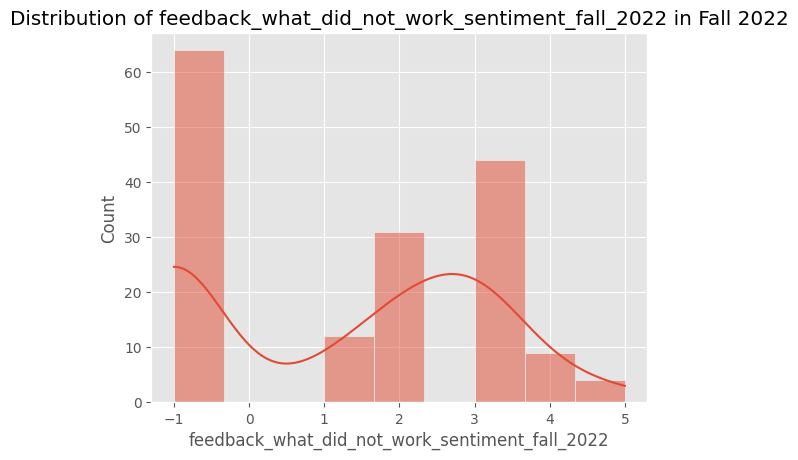

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


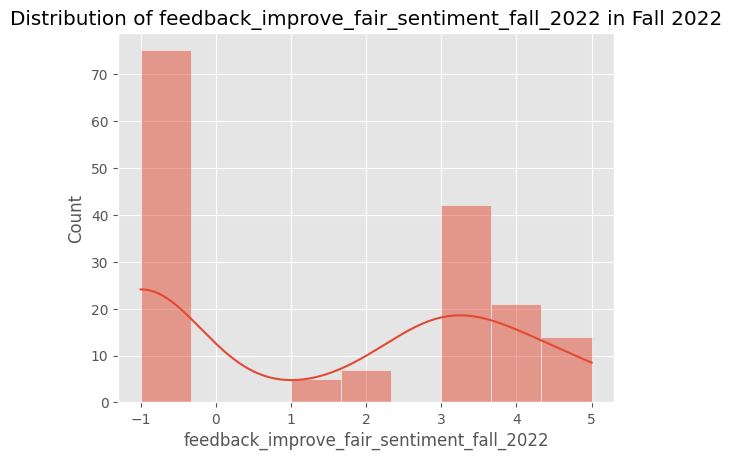

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


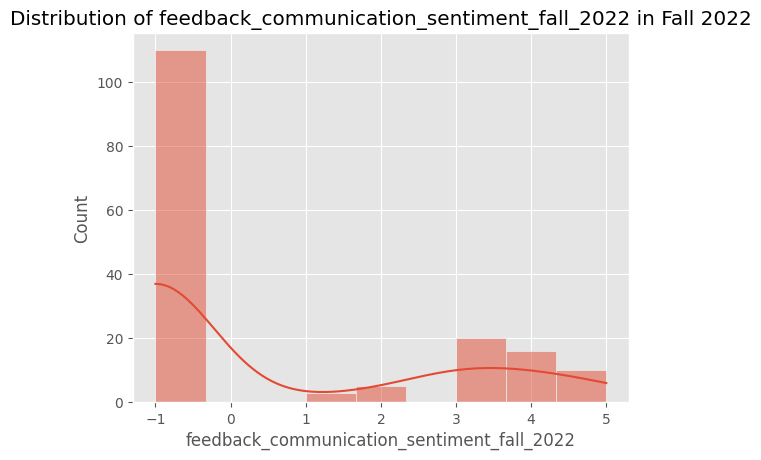

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


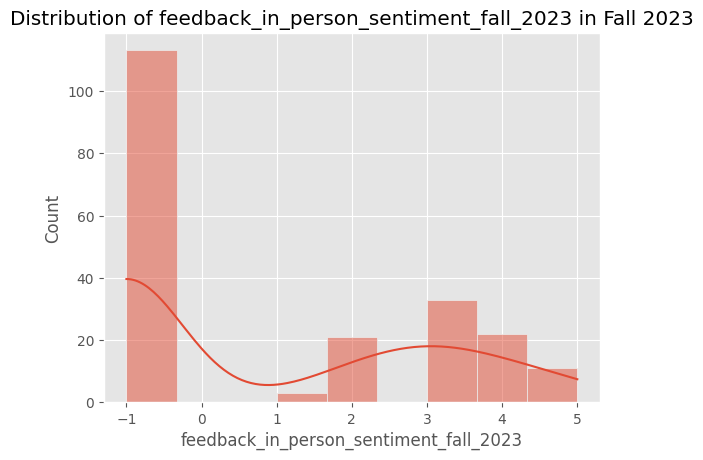

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


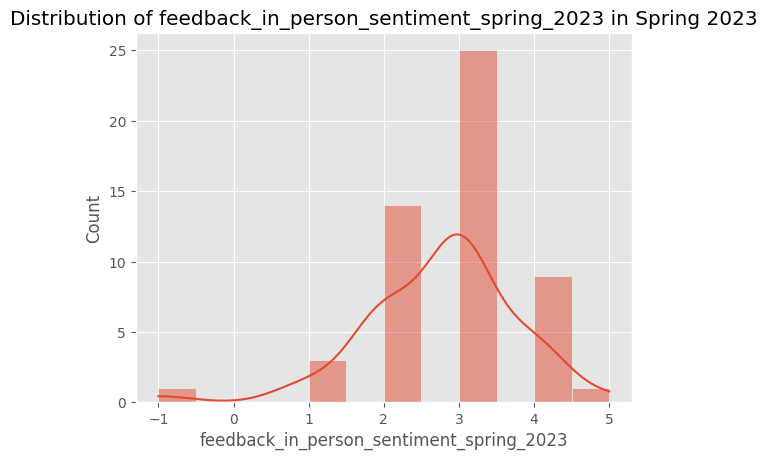

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


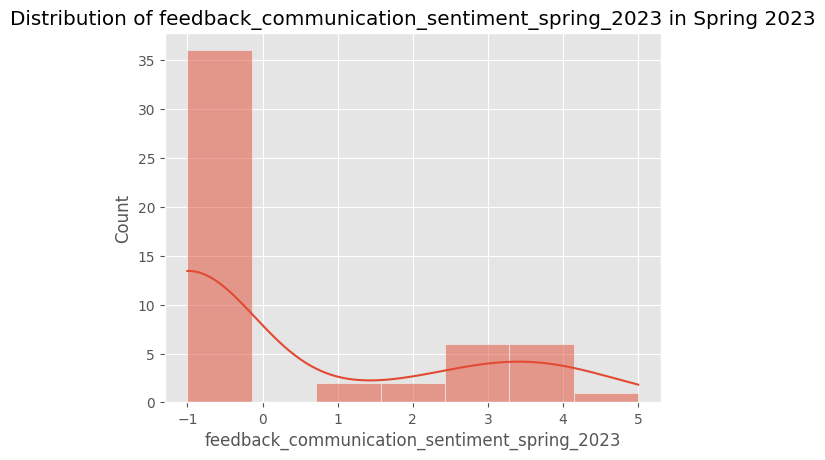

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


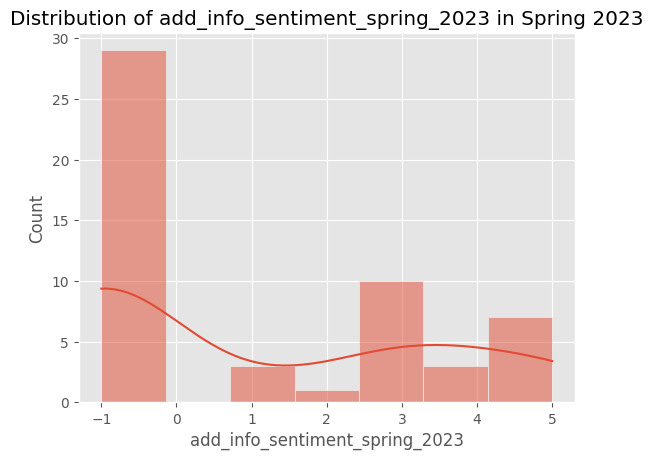

In [20]:

for df, title in zip(dfs, titles):
    sentiment_columns = [col for col in df.columns if '_sentiment_' in col]
    for col in sentiment_columns:
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} in {title}')
        plt.show()

In [21]:

"""
columns_of_interest_fall_21 = ['any_dislike_comm', 'feedback_company_showcase', 'feedback_documentation', 'feedback_what_worked', 'feedback_what_did_not_work', 'feedback_career_fair', 'other_comm']
columns_of_interest_fall_22 = ['feedback_what_worked', 'feedback_what_did_not_work','feedback_improve_fair', 'feedback_communication', 'feedback_comm_extra']
columns_of_interest_fall_23 = ['feedback_in_person\n\nfeedback_in_person']
columns_of_interest_spring_23 = ['feedback_in_person', 'feedback_communication', 'add_info']
"""

"\ncolumns_of_interest_fall_21 = ['any_dislike_comm', 'feedback_company_showcase', 'feedback_documentation', 'feedback_what_worked', 'feedback_what_did_not_work', 'feedback_career_fair', 'other_comm']\ncolumns_of_interest_fall_22 = ['feedback_what_worked', 'feedback_what_did_not_work','feedback_improve_fair', 'feedback_communication', 'feedback_comm_extra']\ncolumns_of_interest_fall_23 = ['feedback_in_person\n\nfeedback_in_person']\ncolumns_of_interest_spring_23 = ['feedback_in_person', 'feedback_communication', 'add_info']\n"

In [22]:
#I want to visualize
#I have these scores in columns right and first let's see feedback_career_fair for 2021, feedback_improve_fair 2022, 'feedback_in_person\n\nfeedback_in_person' fall 2023, feedback_in_person spring 2023

In [23]:

"""
# these 4 are a subset of the sentiment columns that are similar data
columns_to_analyze = {
    'fall_2021': 'feedback_career_fair_sentiment_fall_2021',
    'fall_2022': 'feedback_improve_fair_sentiment_fall_2022',
    'fall_2023': 'feedback_in_person\n\nfeedback_in_person_sentiment_fall_2023',
    'spring_2023': 'feedback_in_person_sentiment_spring_2023'
}

extracted_data = {}
for df, title in zip(dfs, titles):
    sentiment_column = columns_to_analyze.get(title.replace(' ', '_').lower(), None)
    if sentiment_column and sentiment_column in df.columns:
        extracted_data[title] = df[sentiment_column]

for title, data in extracted_data.items():
    sns.histplot(data, kde=True)
    plt.title(f'Distribution of Sentiment Scores for {title.replace("_", " ").title()}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()
"""

'\n# these 4 are a subset of the sentiment columns that are similar data\ncolumns_to_analyze = {\n    \'fall_2021\': \'feedback_career_fair_sentiment_fall_2021\',\n    \'fall_2022\': \'feedback_improve_fair_sentiment_fall_2022\',\n    \'fall_2023\': \'feedback_in_person\n\nfeedback_in_person_sentiment_fall_2023\',\n    \'spring_2023\': \'feedback_in_person_sentiment_spring_2023\'\n}\n\nextracted_data = {}\nfor df, title in zip(dfs, titles):\n    sentiment_column = columns_to_analyze.get(title.replace(\' \', \'_\').lower(), None)\n    if sentiment_column and sentiment_column in df.columns:\n        extracted_data[title] = df[sentiment_column]\n\nfor title, data in extracted_data.items():\n    sns.histplot(data, kde=True)\n    plt.title(f\'Distribution of Sentiment Scores for {title.replace("_", " ").title()}\')\n    plt.xlabel(\'Sentiment Score\')\n    plt.ylabel(\'Frequency\')\n    plt.show()\n'

In [24]:
student_fall_21.columns

Index(['id', 'major', 'classification', 'attend_company_showcase',
       'rate_company_showcase', 'feedback_company_showcase',
       'where_found_info', 'use_any_website_resources', 'any_dislike_comm',
       'rate_whether_info_sent_timely', 'rate_documentation',
       'feedback_documentation', 'date', 'overall_rating',
       'feedback_what_worked', 'feedback_what_did_not_work',
       'feedback_career_fair', 'rate_career_virtual_platform',
       'issues_career_virtual_platform',
       'favorite_features_career_virtual_platform',
       'future_features_career_virtual_platform', 'other_comm', 'Year',
       'any_dislike_comm_sentiment_fall_2021',
       'feedback_company_showcase_sentiment_fall_2021',
       'feedback_documentation_sentiment_fall_2021',
       'feedback_what_worked_sentiment_fall_2021',
       'feedback_what_did_not_work_sentiment_fall_2021',
       'feedback_career_fair_sentiment_fall_2021',
       'other_comm_sentiment_fall_2021'],
      dtype='object')

In [25]:
# Define a function to create sentiment columns based on a semester prefix
def get_sentiment_columns(df, semester_prefix):
    return [col for col in df.columns if col.endswith(f'sentiment_{semester_prefix}')]

# Create lists for each DataFrame
sentiment_columns_fall_21 = get_sentiment_columns(student_fall_21, 'fall_2021')
sentiment_columns_fall_22 = get_sentiment_columns(student_fall_22, 'fall_2022')
sentiment_columns_fall_23 = get_sentiment_columns(student_fall_23, 'fall_2023')
sentiment_columns_spring_23 = get_sentiment_columns(student_spring_23, 'spring_2023')

sentiment_columns_fall_22

['feedback_what_worked_sentiment_fall_2022',
 'feedback_what_did_not_work_sentiment_fall_2022',
 'feedback_improve_fair_sentiment_fall_2022',
 'feedback_communication_sentiment_fall_2022']

In [26]:
student_fall_21

,id,major,classification,attend_company_showcase,rate_company_showcase,feedback_company_showcase,where_found_info,use_any_website_resources,any_dislike_comm,rate_whether_info_sent_timely,...,future_features_career_virtual_platform,other_comm,Year,any_dislike_comm_sentiment_fall_2021,feedback_company_showcase_sentiment_fall_2021,feedback_documentation_sentiment_fall_2021,feedback_what_worked_sentiment_fall_2021,feedback_what_did_not_work_sentiment_fall_2021,feedback_career_fair_sentiment_fall_2021,other_comm_sentiment_fall_2021
0,1,Petroleum Engineering,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Career Fair Plus t...",NaN,9.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,-1,-1,-1
1,2,Aerospace Engineering,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.edu),"Company Search/Information, Student Checklist,...",NaN,NaN,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,3,-1,-1
2,3,Mechanical Engineering,Sophomore,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.edu),Company Search/Information,NaN,10.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,3,-1,-1
3,4,Mechanical Engineering,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.edu),"Company Search/Information, Student Checklist",NaN,8.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,-1,-1,-1
4,5,Electronic Systems Engineering Technology,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,Company Search/Information,NaN,10.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,Mechanical Engineering,Freshman,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Student Checklist,...",NaN,9.0,...,NaN,I appreciate everything you did! It was a good...,Fall 2021,-1,-1,-1,-1,-1,-1,4
132,133,Industrial & Systems Engineering,Masters,Yes,8.0,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Career Fair Plus t...",NaN,9.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,-1,-1,-1
133,134,Civil & Environmental Engineering,Senior,No,NaN,NaN,"SEC Social Media (Instagram, Facebook, or Link...","Company Search/Information, Student Checklist",NaN,8.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,-1,-1,-1
134,135,Computer Science,Sophomore,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Student Checklist",NaN,7.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,-1,-1,-1


In [27]:
# Iterate over each sentiment column and print the value counts
for col in sentiment_columns_fall_21:
    print(f"Value counts for {col}:")
    print(student_fall_21[col].value_counts())
    print("\n")  # Add a newline for better readability between columns


Value counts for any_dislike_comm_sentiment_fall_2021:
any_dislike_comm_sentiment_fall_2021
-1    117
 1      9
 3      5
 2      4
 5      1
Name: count, dtype: int64


Value counts for feedback_company_showcase_sentiment_fall_2021:
feedback_company_showcase_sentiment_fall_2021
-1    110
 3     12
 5      5
 2      5
 4      3
 1      1
Name: count, dtype: int64


Value counts for feedback_documentation_sentiment_fall_2021:
feedback_documentation_sentiment_fall_2021
-1    116
 4      7
 3      6
 2      3
 5      3
 1      1
Name: count, dtype: int64


Value counts for feedback_what_worked_sentiment_fall_2021:
feedback_what_worked_sentiment_fall_2021
-1    93
 4    20
 5    16
 3     4
 1     2
 2     1
Name: count, dtype: int64


Value counts for feedback_what_did_not_work_sentiment_fall_2021:
feedback_what_did_not_work_sentiment_fall_2021
-1    89
 2    19
 3    14
 4     7
 1     6
 5     1
Name: count, dtype: int64


Value counts for feedback_career_fair_sentiment_fall_2021:
feedb

In [36]:
from statsmodels.sandbox.stats.runs import runstest_1samp

# Create a binary sequence where 1 indicates a -1 value and 0 indicates otherwise
for cols in sentiment_columns_fall_21:
    binary_sequence = (student_fall_21[col] == -1).astype(int)

# Perform the run test
z_stat, p_value = runstest_1samp(binary_sequence, correction=False)
print(f'Run Test p-value: {p_value}')

Run Test p-value: 0.6151913974697379


In [45]:
def sample_based_imputation(df, columns):
    for col in columns:
        non_negative_values = df[df[col] >= 0][col]
        if len(non_negative_values) > 0:
            imputed_values = np.random.choice(non_negative_values, size=df[df[col] == -1].shape[0])
            df.loc[df[col] == -1, col] = imputed_values
    return df

student_fall_21_before = student_fall_21.copy()

student_fall_21 = sample_based_imputation(student_fall_21, sentiment_columns_fall_21)

In [46]:
# Iterate over each sentiment column and print the value counts
for col in sentiment_columns_fall_22:
    print(f"Value counts for {col}:")
    print(student_fall_22[col].value_counts())
    print("\n")  # Add a newline for better readability between columns

Value counts for feedback_what_worked_sentiment_fall_2022:
feedback_what_worked_sentiment_fall_2022
 4    56
-1    51
 5    40
 3    12
 1     3
 2     2
Name: count, dtype: int64


Value counts for feedback_what_did_not_work_sentiment_fall_2022:
feedback_what_did_not_work_sentiment_fall_2022
-1    64
 3    44
 2    31
 1    12
 4     9
 5     4
Name: count, dtype: int64


Value counts for feedback_improve_fair_sentiment_fall_2022:
feedback_improve_fair_sentiment_fall_2022
-1    75
 3    42
 4    21
 5    14
 2     7
 1     5
Name: count, dtype: int64


Value counts for feedback_communication_sentiment_fall_2022:
feedback_communication_sentiment_fall_2022
-1    110
 3     20
 4     16
 5     10
 2      5
 1      3
Name: count, dtype: int64




In [47]:
# Value counts before imputation
value_counts_before = {
    'any_dislike_comm_sentiment_fall_2021': {
        -1: 117,
        1: 9,
        3: 5,
        2: 4,
        5: 1
    },
    'feedback_company_showcase_sentiment_fall_2021': {
        -1: 110,
        3: 12,
        5: 5,
        2: 5,
        4: 3,
        1: 1
    },
    'feedback_documentation_sentiment_fall_2021': {
        -1: 116,
        4: 7,
        3: 6,
        2: 3,
        5: 3,
        1: 1
    },
    'feedback_what_worked_sentiment_fall_2021': {
        -1: 93,
        4: 20,
        5: 16,
        3: 4,
        1: 2,
        2: 1
    },
    'feedback_what_did_not_work_sentiment_fall_2021': {
        -1: 89,
        2: 19,
        3: 14,
        4: 7,
        1: 6,
        5: 1
    },
    'feedback_career_fair_sentiment_fall_2021': {
        -1: 99,
        3: 16,
        2: 7,
        5: 6,
        4: 5,
        1: 3
    },
    'other_comm_sentiment_fall_2021': {
        -1: 115,
        5: 8,
        4: 5,
        2: 3,
        3: 3,
        1: 2
    }
}

# Calculate new distributions after imputation
value_counts_after = {}
for col in sentiment_columns_fall_21:
    value_counts_after[col] = student_fall_21[col].value_counts()

# Print value counts before and after imputation for comparison
for col in sentiment_columns_fall_21:
    print(f"Distribution for {col} before imputation:")
    print(value_counts_before[col])
    print(f"Distribution for {col} after imputation:")
    print(value_counts_after[col])
    print()


Distribution for any_dislike_comm_sentiment_fall_2021 before imputation:
{-1: 117, 1: 9, 3: 5, 2: 4, 5: 1}
Distribution for any_dislike_comm_sentiment_fall_2021 after imputation:
any_dislike_comm_sentiment_fall_2021
1    59
2    38
3    32
5     7
Name: count, dtype: int64

Distribution for feedback_company_showcase_sentiment_fall_2021 before imputation:
{-1: 110, 3: 12, 5: 5, 2: 5, 4: 3, 1: 1}
Distribution for feedback_company_showcase_sentiment_fall_2021 after imputation:
feedback_company_showcase_sentiment_fall_2021
3    64
2    30
5    21
4    15
1     6
Name: count, dtype: int64

Distribution for feedback_documentation_sentiment_fall_2021 before imputation:
{-1: 116, 4: 7, 3: 6, 2: 3, 5: 3, 1: 1}
Distribution for feedback_documentation_sentiment_fall_2021 after imputation:
feedback_documentation_sentiment_fall_2021
4    56
3    39
5    18
2    17
1     6
Name: count, dtype: int64

Distribution for feedback_what_worked_sentiment_fall_2021 before imputation:
{-1: 93, 4: 20, 5: 16, 3

In [48]:
# Function to calculate proportions
def calculate_proportions(series):
    return series.value_counts(normalize=True)

# Proportions before imputation
before_imputation_proportions = {}
for col in sentiment_columns_fall_21:
    before_imputation_proportions[col] = calculate_proportions(student_fall_21_before[col])

# Proportions after imputation
after_imputation_proportions = {}
for col in sentiment_columns_fall_21:
    after_imputation_proportions[col] = calculate_proportions(student_fall_21[col])

# Compare proportions
for col in sentiment_columns_fall_21:
    print(f"Proportions for {col} before imputation:")
    print(before_imputation_proportions[col])
    
    print(f"Proportions for {col} after imputation:")
    print(after_imputation_proportions[col])
    
    print("\n")


Proportions for any_dislike_comm_sentiment_fall_2021 before imputation:
any_dislike_comm_sentiment_fall_2021
1    0.433824
2    0.279412
3    0.235294
5    0.051471
Name: proportion, dtype: float64
Proportions for any_dislike_comm_sentiment_fall_2021 after imputation:
any_dislike_comm_sentiment_fall_2021
1    0.433824
2    0.279412
3    0.235294
5    0.051471
Name: proportion, dtype: float64


Proportions for feedback_company_showcase_sentiment_fall_2021 before imputation:
feedback_company_showcase_sentiment_fall_2021
3    0.470588
2    0.220588
5    0.154412
4    0.110294
1    0.044118
Name: proportion, dtype: float64
Proportions for feedback_company_showcase_sentiment_fall_2021 after imputation:
feedback_company_showcase_sentiment_fall_2021
3    0.470588
2    0.220588
5    0.154412
4    0.110294
1    0.044118
Name: proportion, dtype: float64


Proportions for feedback_documentation_sentiment_fall_2021 before imputation:
feedback_documentation_sentiment_fall_2021
4    0.411765
3    0.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


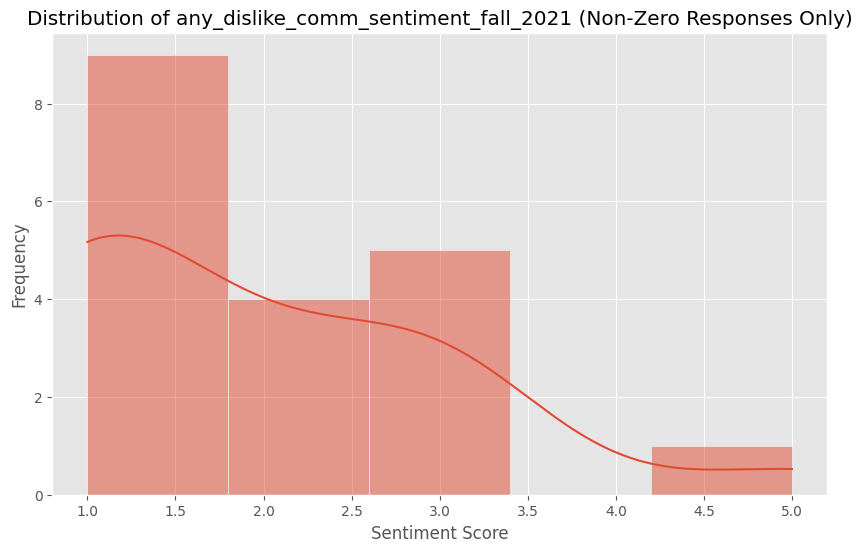

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


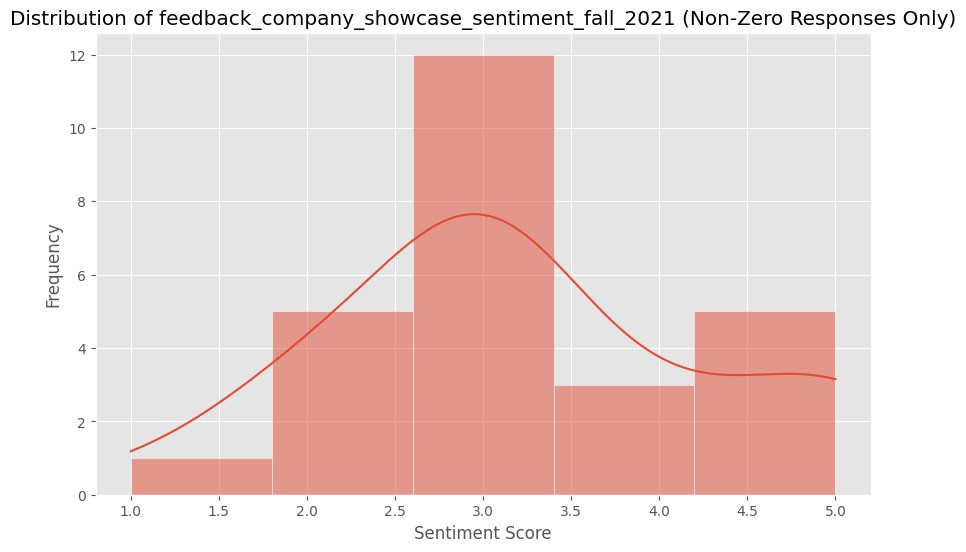

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


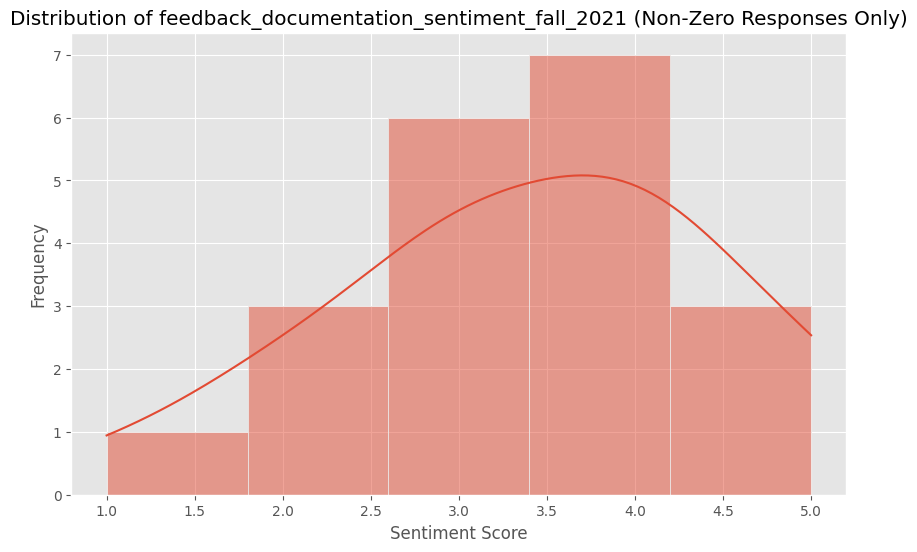

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


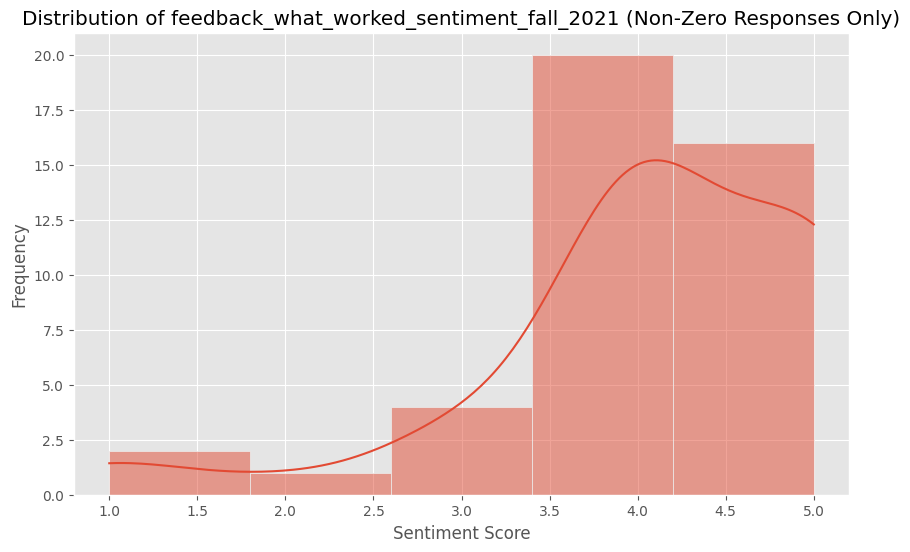

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


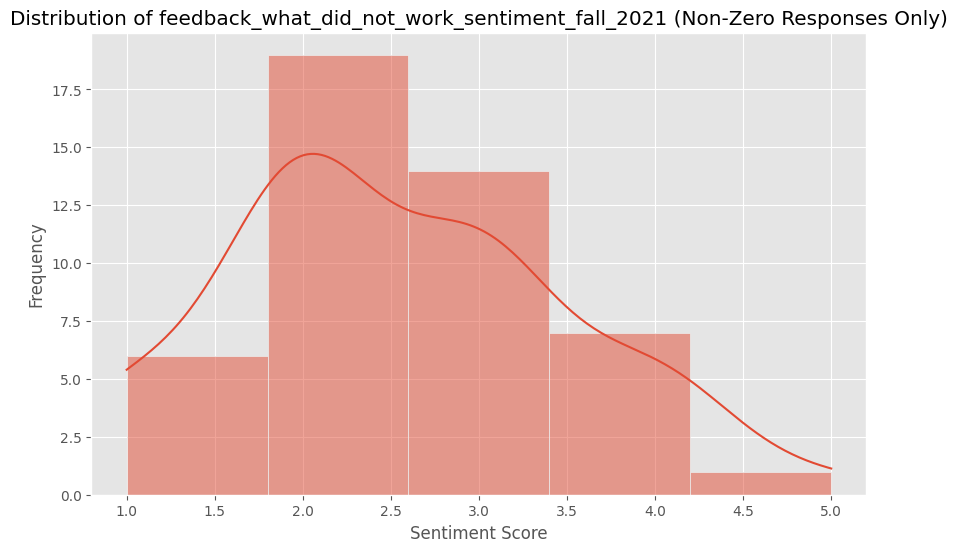

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


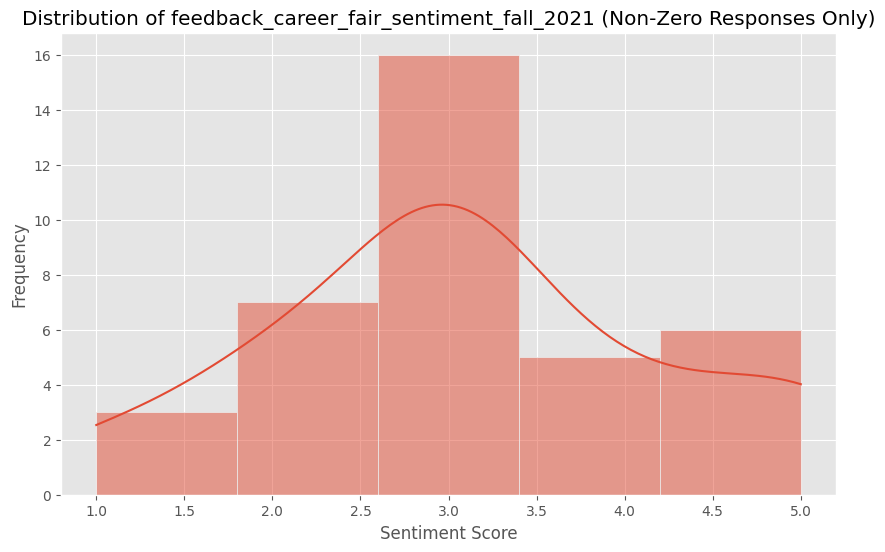

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


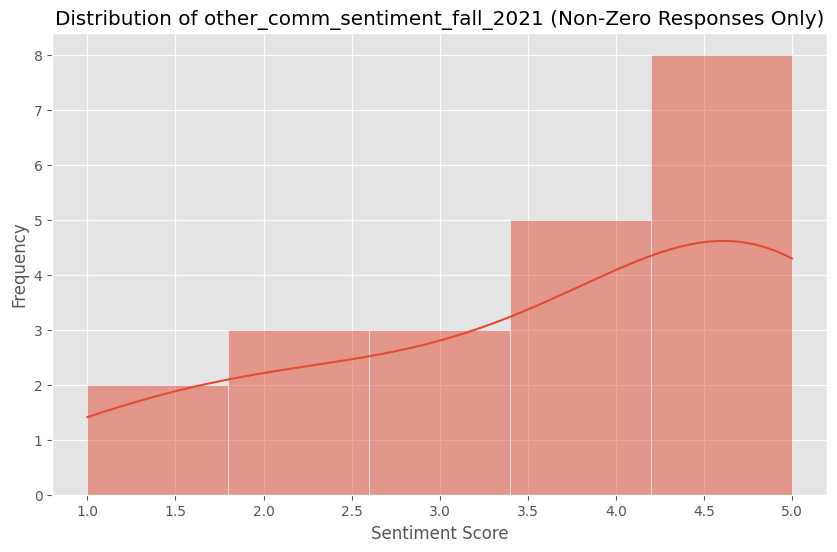

In [30]:
for col in sentiment_columns_fall_21:
    non_zero_responses = student_fall_21[col][student_fall_21[col] > 0]
    plt.figure(figsize=(10, 6))
    sns.histplot(non_zero_responses, kde=True, bins=5)
    plt.title(f'Distribution of {col} (Non-Zero Responses Only)')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

In [31]:
student_fall_22.columns

Index(['id', 'attend_in_person_fair', 'companies_researched_before_fair',
       'overall_rating', 'feedback_what_worked', 'feedback_what_did_not_work',
       'feedback_improve_fair', 'attend_virtual_fair',
       'rate_virtual_career_fair', 'favorite_features_virtual_app',
       'issues_virtual_career_app', 'future_features_career_app',
       'attend_company_showcase', 'rate_company_showcase',
       'rate_company_showcase_accessability', 'rate_company_showcase_use',
       'rate_company_diversity', 'feedback_company_showcase',
       'attend_welcome_social', 'rate_welcome_social',
       'rate_welcome_social_accessibility',
       'rate_welcome_social_company_diversity',
       'impact_welcome_social_on_fair', 'feedback_welcome_social',
       'rate_ability_to_communicate_info', 'where_found_info',
       'use_any_website_resources', 'feedback_communication',
       'rate_whether_info_sent_timely', 'rate_documentation', 'Year',
       'feedback_what_worked_sentiment_fall_2022',
  

In [32]:
"""
# Iterate over each sentiment column to replace 0 values with the custom-rounded mean of non-zero values
for col in sentiment_columns_fall_21:
    # Calculate the mean of non-zero values
    non_zero_mean = student_fall_21[col][student_fall_21[col] > 0].mean()
    
    # Apply custom rounding
    if non_zero_mean % 1 >= 0.5:
        rounded_mean = int(non_zero_mean) + 1
    else:
        rounded_mean = int(non_zero_mean)
    
    # Replace 0 values with the rounded mean
    student_fall_21[col] = student_fall_21[col].replace(0, rounded_mean)

# Now, you can proceed with visualization or further analysis
"""




'\n# Iterate over each sentiment column to replace 0 values with the custom-rounded mean of non-zero values\nfor col in sentiment_columns_fall_21:\n    # Calculate the mean of non-zero values\n    non_zero_mean = student_fall_21[col][student_fall_21[col] > 0].mean()\n    \n    # Apply custom rounding\n    if non_zero_mean % 1 >= 0.5:\n        rounded_mean = int(non_zero_mean) + 1\n    else:\n        rounded_mean = int(non_zero_mean)\n    \n    # Replace 0 values with the rounded mean\n    student_fall_21[col] = student_fall_21[col].replace(0, rounded_mean)\n\n# Now, you can proceed with visualization or further analysis\n'